<a href="https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/neurosymbolicai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neuro-Symbolic AI**

## **Step 0: Download the dataset**

In [7]:
!wget -nc https://www.dropbox.com/scl/fi/vf5hoasomkbulr9xartz5/pm25_20180101_20231231.csv?rlkey=5m900gyo1f97uvevgnvar575b&st=vb1dwhtw&dl=1

--2024-12-27 07:19:01--  https://www.dropbox.com/scl/fi/vf5hoasomkbulr9xartz5/pm25_20180101_20231231.csv?rlkey=5m900gyo1f97uvevgnvar575b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5524b9600a52eeb125186c9ec5.dl.dropboxusercontent.com/cd/0/inline/ChDLVbfjp1j9PgE9MHYjNN_QXaj8OYweD-CZTTTQS6XzmqMkrzC-hI1Zrhut0QobFoK6-dHbpKLybOAl45RP5iFaUjXTNfBRtQBBp1zaicEUXomzeyc4MI-w9CUoHl4Z9Y3gnmmJCOpmZWrUmYat85d2/file# [following]
--2024-12-27 07:19:01--  https://uc5524b9600a52eeb125186c9ec5.dl.dropboxusercontent.com/cd/0/inline/ChDLVbfjp1j9PgE9MHYjNN_QXaj8OYweD-CZTTTQS6XzmqMkrzC-hI1Zrhut0QobFoK6-dHbpKLybOAl45RP5iFaUjXTNfBRtQBBp1zaicEUXomzeyc4MI-w9CUoHl4Z9Y3gnmmJCOpmZWrUmYat85d2/file
Resolving uc5524b9600a52eeb125186c9ec5.dl.dropboxusercontent.com (uc5524b9600a52eeb125186c9ec5.dl.dropboxusercontent.com)... 162.12

In [8]:
!mv pm25_20180101_20231231.csv?rlkey=5m900gyo1f97uvevgnvar575b pm25_20180101_20231231.csv

In [9]:
!head pm25_20180101_20231231.csv

TimeStamp,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,24202530,11202040,13114510,20206010,13212520,4101020,11240010,13120010,28203060,37201080,1102510,14109040,21220010,7201200,47211050,30201300,11237020,33209010,17201310,22201060,13211010,40132530,18202020,12225090,13110010,12219060,15102510,43201180,13104540,14211510,40214010,11346510,37205010,2205010,12344020,27218010,3211070,20485950,13209010,14112020,27367010,30203010,33202530,11201510,5205010,25212010,38208030,13201040,14106010,24207510,30205010,33202400,11239010,28105010,25206510,15108010,9204020,14201050,30201270,28217010,28214510,22202150,23110040,27209510,35202020,12208510,37202010,13123010,14203040,18204010,34369010,13203510,43211050,21213020,7206050,13221010,8406050,24212010,36402010,35211010,8541010,28108010,40223510,14101010,19201011,25201540,33202420,28101520,15216010,28108510,31202020,30322010,12327010,4205020,1107020,14212020,5201010,28203020,27217510,1213510,23202030,2820703

# **Step1: Read the csv File**

In [ ]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/pm25_20180101_20231231.csv',)
dataset

,TimeStamp,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,...,13103010,13105010,13108010,15201150,27201030,26210510,20202050,5203020,34207090,44214010
0,2018-01-01 00:00:00,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,...,24.0,31.0,34.0,8.0,13.0,20.0,6.0,17.0,14.0,6.0
1,2018-01-01 01:00:00,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,...,24.0,31.0,34.0,8.0,13.0,20.0,6.0,17.0,14.0,6.0
2,2018-01-01 02:00:00,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,...,27.0,34.0,43.0,6.0,15.0,21.0,7.0,12.0,13.0,6.0
3,2018-01-01 03:00:00,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,...,23.0,31.0,35.0,7.0,13.0,20.0,7.0,4.0,16.0,9.0
4,2018-01-01 04:00:00,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,...,22.0,21.0,32.0,9.0,10.0,22.0,6.0,2.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2024-01-01 19:00:00,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52604,2024-01-01 20:00:00,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52605,2024-01-01 21:00:00,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52606,2024-01-01 22:00:00,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0


# **Step2:Drop the first column(Timestamp)**

In [ ]:
# Drop the first column
dataset = dataset.iloc[:, 1:]
dataset

,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,...,13103010,13105010,13108010,15201150,27201030,26210510,20202050,5203020,34207090,44214010
0,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,24.0,31.0,34.0,8.0,13.0,20.0,6.0,17.0,14.0,6.0
1,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,24.0,31.0,34.0,8.0,13.0,20.0,6.0,17.0,14.0,6.0
2,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,14.0,...,27.0,34.0,43.0,6.0,15.0,21.0,7.0,12.0,13.0,6.0
3,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,11.0,...,23.0,31.0,35.0,7.0,13.0,20.0,7.0,4.0,16.0,9.0
4,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,11.0,...,22.0,21.0,32.0,9.0,10.0,22.0,6.0,2.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52604,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52605,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0
52606,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,9.0,7.0,17.0,2.0,13.0,0.0,1.0,9.0,6.0,4.0


# **Step3:Checking Abnormal values**

<Axes: >

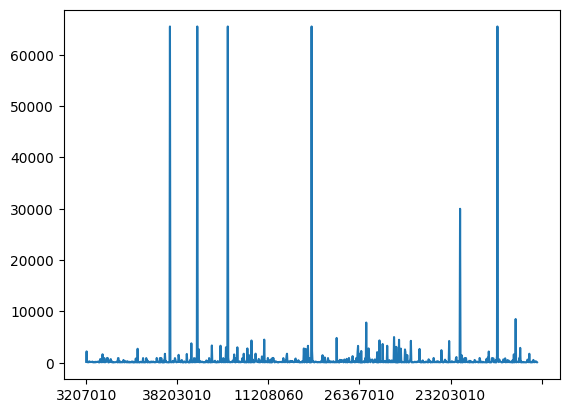

In [ ]:
dataset.max().plot()


# **Step 4: Replacing Extremely High Values with NaN**

<Axes: >

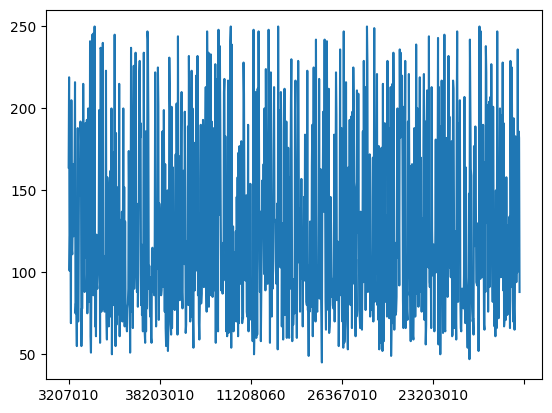

In [ ]:
dataset.where(dataset <=250,np.nan, inplace=True)
dataset.max().plot()


# **Step 5: Identifying Minimum Values**

<Axes: >

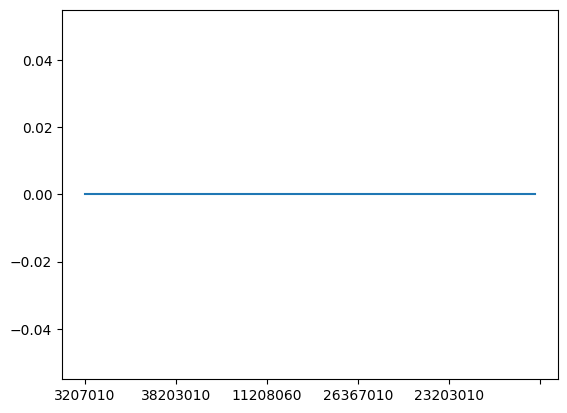

In [ ]:
dataset.where(dataset >= 0, np.nan, inplace=True)
dataset.min().plot()

# **Step6:Calculate the percentage of NaN values in each column and droping columns with more than 80% NaN values**

In [ ]:
nan_threshold = 0.8 * len(dataset)
dataset = dataset.dropna(axis=1, thresh=nan_threshold)
dataset

,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,...,11222020,13103010,13105010,13108010,15201150,27201030,26210510,20202050,34207090,44214010
0,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
1,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
2,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,14.0,...,40.0,27.0,34.0,43.0,6.0,15.0,21.0,7.0,13.0,6.0
3,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,11.0,...,24.0,23.0,31.0,35.0,7.0,13.0,20.0,7.0,16.0,9.0
4,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,11.0,...,23.0,22.0,21.0,32.0,9.0,10.0,22.0,6.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52604,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52605,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52606,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0



# **Step 7: Filling Missing Values Using the Mean Imputation Method**

In [ ]:
dataset.fillna(dataset.mean(), inplace=True)
dataset


<ipython-input-42-b439089eea23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.fillna(dataset.mean(), inplace=True)


,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,...,11222020,13103010,13105010,13108010,15201150,27201030,26210510,20202050,34207090,44214010
0,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
1,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
2,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,14.0,...,40.0,27.0,34.0,43.0,6.0,15.0,21.0,7.0,13.0,6.0
3,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,11.0,...,24.0,23.0,31.0,35.0,7.0,13.0,20.0,7.0,16.0,9.0
4,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,11.0,...,23.0,22.0,21.0,32.0,9.0,10.0,22.0,6.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52604,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52605,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52606,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0


# **Step 8: Final Check for NaN and Negative Values in the Dataset**

In [ ]:
if dataset.isnull().values.any():
    print("There are still NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")

dataset

There are no NaN values in the dataset.


,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,...,11222020,13103010,13105010,13108010,15201150,27201030,26210510,20202050,34207090,44214010
0,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
1,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
2,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,14.0,...,40.0,27.0,34.0,43.0,6.0,15.0,21.0,7.0,13.0,6.0
3,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,11.0,...,24.0,23.0,31.0,35.0,7.0,13.0,20.0,7.0,16.0,9.0
4,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,11.0,...,23.0,22.0,21.0,32.0,9.0,10.0,22.0,6.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52604,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52605,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52606,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0


<Axes: >

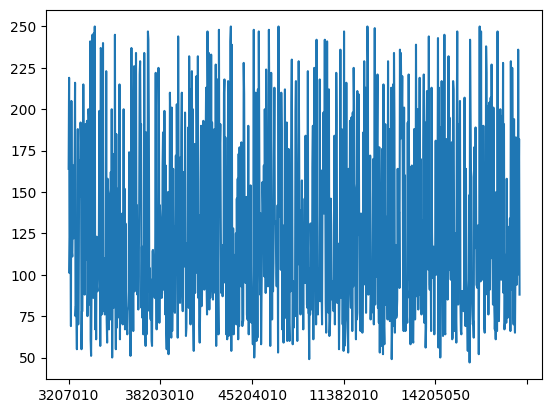

In [ ]:
dataset.max().plot()


<Axes: >

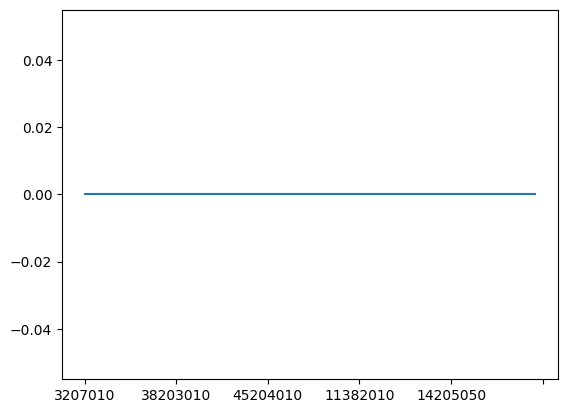

In [ ]:
dataset.min().plot()

# **Step9: Saving the Processed Dataset After Applying Preprocessing Techniques**

In [ ]:
dataset.to_csv('/content/updated_dataset.csv', index=False)

# Print confirmation
print("Updated dataset saved to 'updated_dataset.csv'")

Updated dataset saved to 'updated_dataset.csv'


# **Step10: Read the Updated Dataset**

In [ ]:
updated_dataset = pd.read_csv("/content/updated_dataset.csv")
updated_dataset

,3207010,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,...,11222020,13103010,13105010,13108010,15201150,27201030,26210510,20202050,34207090,44214010
0,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
1,4.0,14.0,26.0,8.0,13.0,17.0,9.0,6.0,12.0,16.0,...,32.0,24.0,31.0,34.0,8.0,13.0,20.0,6.0,14.0,6.0
2,12.0,10.0,27.0,0.0,21.0,23.0,1.0,13.0,12.0,14.0,...,40.0,27.0,34.0,43.0,6.0,15.0,21.0,7.0,13.0,6.0
3,5.0,13.0,19.0,2.0,16.0,12.0,6.0,3.0,12.0,11.0,...,24.0,23.0,31.0,35.0,7.0,13.0,20.0,7.0,16.0,9.0
4,7.0,13.0,18.0,2.0,12.0,15.0,2.0,7.0,19.0,11.0,...,23.0,22.0,21.0,32.0,9.0,10.0,22.0,6.0,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52604,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52605,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0
52606,3.0,4.0,14.0,18.0,15.0,9.0,4.0,25.0,5.0,5.0,...,18.0,9.0,7.0,17.0,2.0,13.0,0.0,1.0,6.0,4.0


# **Step11: Predicting Air Pollution Values for the First 10 Columns for the Next 10 Days Using Bi-LSTM Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
import math

# Select the first 10 columns for prediction (assuming the first column is timestamp)
k = 11
columns_to_predict = updated_dataset.columns[1:k]  # Select the first 10 columns (excluding timestamp)

# Scale the data for all columns
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(updated_dataset[columns_to_predict])

# Prepare the data for LSTM input
X, y = [], []
lookback = 1  # Using 1 previous timestep to predict the next
for i in range(len(data_scaled) - lookback):
    X.append(data_scaled[i:i+lookback])
    y.append(data_scaled[i+lookback])

X, y = np.array(X), np.array(y)  # Convert to numpy arrays

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))  # One output per column
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test, verbose=0)

# Reverse scaling on predictions and test data
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# Clip negative predictions to 0
y_pred = np.maximum(y_pred, 0)

# Flatten the predictions and actual values for overall evaluation
y_test_flattened = y_test_original.flatten()
y_pred_flattened = y_pred.flatten()

# Calculate overall evaluation metrics
overall_rmse = math.sqrt(mean_squared_error(y_test_flattened, y_pred_flattened))
overall_mae = mean_absolute_error(y_test_flattened, y_pred_flattened)
overall_r2 = r2_score(y_test_flattened, y_pred_flattened)

# Display overall metrics
print("\nOverall Evaluation Metrics:")
print(f"Overall RMSE: {overall_rmse:.4f}")
print(f"Overall MAE: {overall_mae:.4f}")
print(f"Overall R²: {overall_r2:.4f}")

# Predict values for the next 240 hours (10 days)
future_predictions = []
last_input = X[-1:]  # Start with the last input sequence
for _ in range(240):  # Predict for the next 240 hours
    prediction = model.predict(last_input, verbose=0)  # Predict the next step
    future_predictions.append(prediction[0])  # Append the prediction
    # Update last_input with the new prediction
    last_input = np.append(last_input[:, 1:, :], [prediction], axis=1)

# Reverse the scaling on the predicted data and clip negatives
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions = np.maximum(future_predictions, 0)  # Clip negative predictions

# Prepare the output DataFrame
future_predictions_df = pd.DataFrame(
    future_predictions,
    columns=columns_to_predict,
    index=pd.date_range(start="2023-10-31 23:00:00", periods=240, freq='H')  # Next 240 hours
)

# Save to CSV
output_csv_path = 'predictions240hours.csv'
future_predictions_df.to_csv(output_csv_path)

print(f"\nPredictions for the next 240 hours saved to {output_csv_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0020
Epoch 2/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0011
Epoch 3/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0011
Epoch 4/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.0011
Epoch 5/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0011
Epoch 6/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0011
Epoch 7/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0011
Epoch 8/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0011
Epoch 9/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 0.0011
Epoch 10/10
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0011

Overall Evaluation Metrics:
Overall RMSE: 3.8277
Overall MAE: 2.6643
Overall R²: 0.7188

Predictions for the next 240 hours saved to predictions240hours.csv


<ipython-input-49-f0c59c2ce6bd>:85: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start="2023-10-31 23:00:00", periods=240, freq='H')  # Next 240 hours


# **Step 12: Reading the Predicted Air Pollution Values for the Next 10 Days and 10 Columns**

In [ ]:
import pandas as pd
future_predictions_df=pd.read_csv("/content/predictions240hours.csv")
future_predictions_df

,Unnamed: 0,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,24202530
0,2023-10-31 23:00:00,5.345446,12.991408,13.275642,13.347651,9.517594,6.046752,22.072032,6.818363,5.402340,8.351093
1,2023-11-01 00:00:00,6.293464,12.215577,10.512154,12.283895,9.353355,6.849514,19.619124,7.997456,5.982958,10.052781
2,2023-11-01 01:00:00,6.888478,11.579747,8.811533,11.570954,8.992475,7.080735,17.630834,8.718381,6.535463,10.948564
3,2023-11-01 02:00:00,7.233640,11.040293,7.716928,11.069855,8.615580,7.065603,16.051361,9.125044,6.989049,11.426456
4,2023-11-01 03:00:00,7.414830,10.574987,6.981767,10.697695,8.278315,6.953997,14.811003,9.323415,7.330277,11.675499
...,...,...,...,...,...,...,...,...,...,...,...
235,2023-11-10 18:00:00,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
236,2023-11-10 19:00:00,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
237,2023-11-10 20:00:00,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
238,2023-11-10 21:00:00,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989


# **Step13: Drop the frist column it means timestamp column**

In [ ]:
future_predictions_df= future_predictions_df.drop(future_predictions_df.columns[0], axis=1)
future_predictions_df

,29209010,11222030,14215010,33202110,14104030,8344010,43202020,28216010,28209010,24202530
0,5.345446,12.991408,13.275642,13.347651,9.517594,6.046752,22.072032,6.818363,5.402340,8.351093
1,6.293464,12.215577,10.512154,12.283895,9.353355,6.849514,19.619124,7.997456,5.982958,10.052781
2,6.888478,11.579747,8.811533,11.570954,8.992475,7.080735,17.630834,8.718381,6.535463,10.948564
3,7.233640,11.040293,7.716928,11.069855,8.615580,7.065603,16.051361,9.125044,6.989049,11.426456
4,7.414830,10.574987,6.981767,10.697695,8.278315,6.953997,14.811003,9.323415,7.330277,11.675499
...,...,...,...,...,...,...,...,...,...,...
235,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
236,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
237,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989
238,5.610075,6.577713,3.655871,6.942476,5.424214,4.833715,9.176862,6.368562,6.340881,9.857989


# **Step 14:Installing the Pami Library**

In [ ]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.5 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=6ef9ff95a3db6079e857f3c17f699455865c029e4a22dd7024751143c429aabd
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filena

# **Step 15: Converting the DataFrame into Transactional Form**

In [ ]:
from PAMI.extras.convert import denseDF2DB as db
obj = db.denseDF2DB(future_predictions_df)
obj.convert2TransactionalDatabase('TDB.csv', '>=',6)

# **Step16 Statistics**

Database size (total no of transactions) : 240
Number of items : 10
Minimum Transaction Size : 6
Average Transaction Size : 6.3
Maximum Transaction Size : 10
Standard Deviation Transaction Size : 0.8475454756727413
Variance in Transaction Sizes : 0.7213389121338912
Sparsity : 0.37


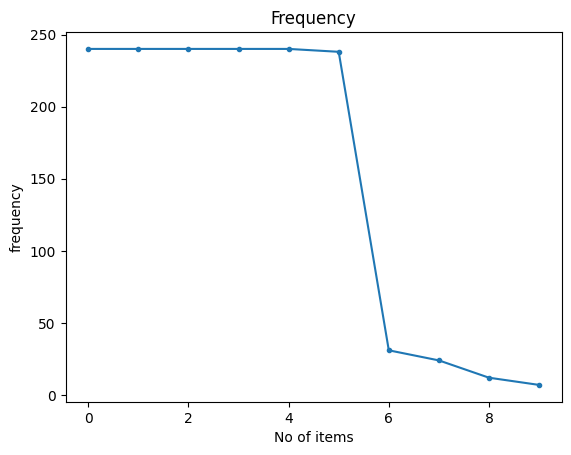

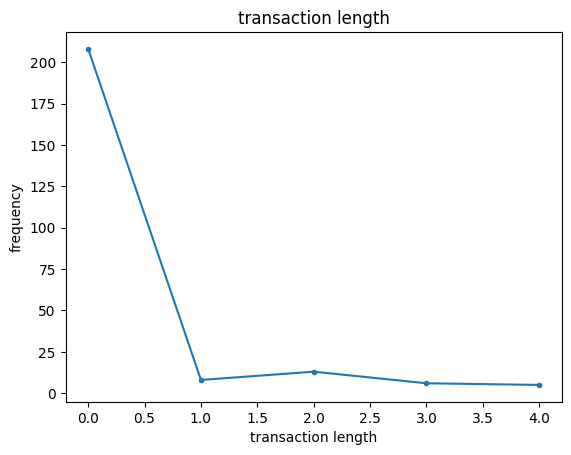

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('TDB.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

# **Step 17: Extracting Patterns from Predicted Data Using the FP-Growth Algorithm**

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as ab
obj = ab.FPGrowth('TDB.csv', 120)
obj.mine()
obj.printResults()
obj.save('10days_frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 63
Total Memory in USS: 6328397824
Total Memory in RSS 6350974976
Total ExecutionTime in ms: 0.007161617279052734


# **Step 18:Display the Frequent Patterns**

In [ ]:
!head /content/10days_frequentPatterns.txt

28209010:238
11222030	28209010:238
33202110	28209010:238
43202020	28209010:238
28216010	28209010:238
24202530	28209010:238
11222030	33202110	28209010:238
11222030	43202020	28209010:238
11222030	28216010	28209010:238
11222030	24202530	28209010:238
